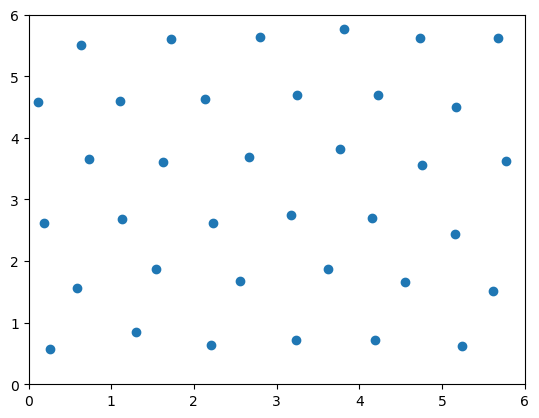

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Natom = 36
L = 6 #盒子边长
NT = 1000
Tinit = 0.5
eps = 1
h = 0.01

x, y = np.zeros(Natom), np.zeros(Natom)
vx, vy = np.zeros(Natom), np.zeros(Natom)
fx, fy = np.zeros([Natom, 2]), np.zeros([Natom, 2])
EP = np.zeros(NT)
EK = np.zeros(NT)
ET = np.zeros(NT)

def initialposvel():
    k = 0
    for i in range(L):
        for j in range(L):
            x[k] = i
            y[k] = j
            vx[k] = random.gauss(0, 1)
            vy[k] = random.gauss(0, 1)
            k += 1

def force(t):
    PE = 0.0
    fx[:, t] = 0.0
    fy[:, t] = 0.0
    for i in range(Natom-1):
        for j in range(i+1, Natom):
            dx = x[i] - x[j]
            dy = y[i] - y[j]
            # 最小镜像法
            dx -= L * np.round(dx / L)
            dy -= L * np.round(dy / L)
            r2 = dx**2 + dy**2
            if r2 < (L/2)**2:
                invr2 = 1.0 / r2
                invr6 = invr2**3
                f = 48 * invr2 * invr6 * (invr6 - 0.5)
                fx[i, t] += f * dx
                fy[i, t] += f * dy
                fx[j, t] -= f * dx
                fy[j, t] -= f * dy
                PE += 4 * (invr6**2 - invr6)
    return PE


def timeevolution():
    initialposvel()
    PE = force(0)
    for t in range(NT-1):
        PE = force((t+1)%2)
        x[:] += vx[:] * h + 0.5 * fx[:, t%2] * h**2
        y[:] += vy[:] * h + 0.5 * fy[:, t%2] * h**2

        x[:] = x[:] % L
        y[:] = y[:] % L


        PE = force((t+1)%2)

        vx[:] += 0.5 * (fx[:, t%2] + fx[:, (t+1)%2]) * h
        vy[:] += 0.5 * (fy[:, t%2] + fy[:, (t+1)%2]) * h

        EK[t] = 0.5 * np.sum(vx[:]**2 +vy[:]**2)
        EP[t] = PE
        ET[t] = EK[t] + EP[t]

def animate():
    fig, ax = plt.subplots()
    scat = ax.scatter(x, y)
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    def update(frame):
        scat.set_offsets(np.c_[x, y])
        return scat,
    ani = animation.FuncAnimation(fig, update, frames=NT, interval=20, blit=True)
    plt.show()

def main():
    timeevolution()
    animate()
main()


    

